## Wordcloud를 하기 위한 준비 단계

jdk 무료버전 설치
 자바 다운로드 링크 https://www.oracle.com/java/technologies/javase-downloads.html
 가입 후 jdk-8u202 버전 windows 또는 macOS 버전 받아 설치 
 내 pc 우측 마우스 클릭 --> 속성 --> 고급 시스템 설정 -->  환경 변수 --> 시스템 변수에서 새로 만들기 --> 
 변수 이름 : JAVA_HOME
 변수 값 : 자바 설치한 디렉션 복사하여 붙여 넣기 예) C:\Program Files\Java\jdk1.8.0_202\bin
 위의 값을 입력하고 모두 확인을 눌러서 나가기
 
jpype 설치
 아나콘다 프롬프트 관리자 권한으로 열어 pip install jpype1==1.1.2 또는 jpype1==0.7.0 설치

konlpy와 wordcloud 설치
 주피터 노트북에서 설치
 pip install konlpy,
 pip install wordcloud

simplejson과 pytagcloud 설치
 아나콘다 프롬프트에서 설치
 pip install simplejson,
 pip install pytagcloud,
 pip install pygame

네이버에서 나눔고딕 다운을 받는다.

본인 컴퓨터에 설치된 pytagcloud폴더의 fonts 폴더로 NanumGothic.ttf 파일을 옮긴다.  
예) C:\Users\USER\Anaconda3\Lib\site-packages\pytagcloud\fonts

폴더 안에 있는 fonts.json 파일을 연결프로그램을 눌러 메모장으로 연다.
아래와 같이 name에 korean, ttf에 NanumGothic.ttf, web에 http://fonts.googleapis.com/earlyaccess/nanumgothic.css 를 적어 저장한다.
![나눔고딕](나눔고딕.jpg)

In [ ]:
 pip install konlpy

In [ ]:
pip install wordcloud

자바 다운로드 링크 https://www.oracle.com/java/technologies/javase-downloads.html

Jpype 다운로드 링크 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

In [ ]:
from bs4 import BeautifulSoup 
import urllib.request 
from urllib.request import urlopen
from urllib.parse import quote
import pytagcloud
import re

from konlpy.tag import Okt
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Wordcloud 할 링크 2개
 1. 중앙일보 : 'https://news.joins.com/search/?keyword='
 2. 동아닷컴 : https://www.donga.com/news/search?query=' 

In [ ]:
# 글자 형태소 분리기
nlp = Okt()

In [ ]:
keyword = '백신'
print(quote(keyword))

In [ ]:
url = 'https://www.donga.com/news/search?query=' + quote(keyword)

In [ ]:
html = urlopen(url)

In [ ]:
soup = BeautifulSoup(html.read(), 'html5lib', from_encoding='utf8')
print(soup)

In [ ]:
# 동아닷컴 크롤링
soup.findAll('a')

In [ ]:
i = 8
soup.findAll('p','tit') [i]

In [ ]:
soup.findAll('p','tit') [i].select('a')

In [ ]:
soup.findAll('p','tit') [i].select('a')[0]

In [ ]:
link = soup.findAll('p','tit') [i].select('a')[0]['href']

In [ ]:
html2 = urlopen(link)
html2

In [ ]:
soup2 = BeautifulSoup(html2.read(), 'html5lib', from_encoding='utf-8')
soup2

In [ ]:
contents = soup2.select('div.article_txt')
contents

In [ ]:
contents[0].findAll (text=True)

In [ ]:
data = str(contents[0].findAll (text=True))
data

In [ ]:
# 동아닷컴
raw = ""

for title in soup.findAll('p', 'tit'):
    title_link = title.select('a')
    article_url = title_link[0]['href']
    try:
        html2 = urlopen(article_url)
        soup2 = BeautifulSoup(html2.read(), 'html5lib', from_encoding='utf-8')
        contents = soup2.select('dev.artilce_txt')
        for i in contents:
            data = str(i.findAll(text=True))
            raw = raw + data
    except Exception as e:
        pass
print(raw)

In [ ]:
nlp = Okt()
nouns = nlp.nouns(raw)
nouns

In [ ]:
nouns[0]

In [ ]:
len(nouns[0])

In [ ]:
result = []
for temp in nouns:
    if len(temp) > 1:
        result.append(temp)
result

In [ ]:
count = Counter(result)
count

In [ ]:
tag= count.most_common(3)
tag

In [ ]:
taglist = pytagcloud.make_tags(tag, maxsize = 100)

In [ ]:
pytagcloud.create_tag_image(taglist, "world_donga.png", size =(1000.600), fontname="korean", rectangular=False)

In [ ]:
img = mimg.imread("world_donga.png")
plt.imshow(img)
plt.show()

In [ ]:
nlp = Okt()
nouns = nlp.nouns(raw)

result = []
for temp in nouns:
    if len(temp) > 1:
        result.append(temp)
result

count = Counter(result)
tag= count.most_common(3)
taglist = pytagcloud.make_tags(tag, maxsize = 100)

pytagcloud.create_tag_image(taglist, "world_donga.png", size =(1000.600),
                            fontname="korean", rectangular=False)

## Test 1차

캐글 타이타닉 파일 다운로드 링크 https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings ; warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. 다운 받은 test 데이터를 아래와 같이 불러오고 index를 PassengerId로 변경하세요.
![문제2](문제2.jpg)

In [6]:
train2 = train.set_index('PassengerId')
train2.drop('Survived', axis=1)
train2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3. train 데이터를 활용해 아래와 같은 dataframe을 도출해보세요. Survived는 생존자는 1, 사망자는 0 입니다. 따라서 Survived의 mean값은
   생존율로 볼 수 있습니다.
![문제3](문제3.jpg)

In [7]:
train2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. countplot을 사용하여 아래와 같은 그래프를 도출해보세요. Pclass의 1은 1등석, 2는 2등석, 3은 3등석입니다. 보시는대로 1등석이 다른 등석
   보다 높은 생존율을 보입니다. y축의 count는 총 수기 때문에 Pclass 별 총 생존수와 총 사망자수로 볼 수 있습니다.
![문제4](문제4.jpg)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

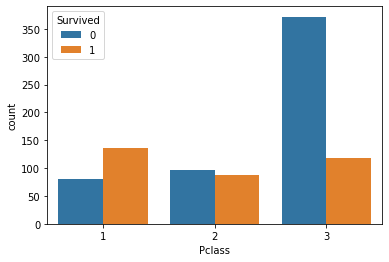

In [8]:
sns.countplot(data=train, x='Pclass', hue='Survived')

5. pivot table을 사용하여 아래와 같은 dataframe을 만들어보세요. C,Q,S는 타이타닉이 경유한 항구의 앞글자이며 승객들은 해당되는 항구에서 
   타이타닉을 탔습니다. C항구에서 탄 사람들이 높은 생존율을 보입니다.
![문제5](문제5.jpg)

In [68]:
index = ['Embarked']
values = ['Survived']
aggfunc = ['mean']
pd.pivot_table(train, index=index, values=values, aggfunc=aggfunc)

,mean
,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [9]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


6. Countplot을 활용하여 아래 그래프를 도출해보세요.
![문제6](문제6.jpg)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

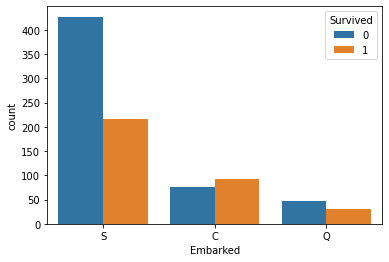

In [10]:
sns.countplot(data=train, x='Embarked', hue='Survived')

7. groupby를 사용하여 아래와 같은 Series를 만들어보세요.
![문제7](문제7.jpg)

In [11]:
groupby['Pclass']

NameError: name 'groupby' is not defined

8. AgeType이라는 컬럼을 만들어 봅시다. 15세 미만은 young, 15세 이상 30세 미만은 middle, 30세 이상은 old로 정합니다.
   아래와 같은 dataframe을 도출해보세요.
![문제8](문제8.jpg)

In [12]:
train.loc[(train['Age']<15), 'AgeType'] = 'young'
train.loc[(train['Age']>=15)&(train['Age']<30), 'AgeType'] = 'middle'
train.loc[(train['Age']>=30), 'AgeType'] = 'old'
train = train.set_index('PassengerId')
train.drop('Survived', axis=1)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


9. 아래와 같은 그래프를 도출해보세요.
![문제9](문제9.jpg)

<AxesSubplot:xlabel='AgeType', ylabel='count'>

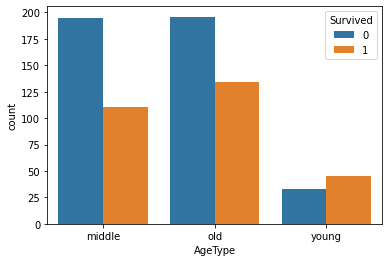

In [13]:
sns.countplot(data=train, x='AgeType', hue='Survived')

10. 나이를 모르는 사람과 나이가 알려진 사람을 구별하는 컬럼을 만들어 봅시다. Age에 나이가 입력되지 않은 조건은 isnull()과 notnull()을 
    사용하여 보다 편하게 전처리할 수 있습니다. 아래와 같은 dataframe을 도출해보세요.
![문제10](문제10.jpg)

In [28]:
train.loc[(train['Age']).isnull(), 'AgeInfo'] = 'Unknown'
train.loc[(train['Age']).notnull(), 'AgeInfo'] = 'Known'
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType,AgeInfo
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle,Known
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old,Known
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle,Known
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old,Known
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old,Known
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle,Known
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle,Known
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Unknown


11. 아래와 같은 그래프를 도출해보세요. 나이가 기록된 사람들의 생존율이 높은 것을 알 수 있습니다.
![문제11](문제11.jpg)

<AxesSubplot:xlabel='AgeInfo', ylabel='count'>

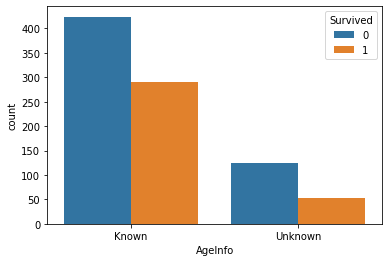

In [29]:
sns.countplot(data=train, x='AgeInfo', hue='Survived')

12. Pclass 별 평균 나이의 dataframe을 구해보세요.
![문제12](문제12.jpg)

In [30]:
train[['Pclass', 'Age']].groupby(['Pclass'], as_index=True).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


13. Age(All) 컬럼을 만들어 보겠습니다. 나이가 기록된 사람은 같은 나이를 입력하시고 나이가 기록 안된 사람은 Pclass 별 평균 나이를
    입력해 봅시다. 아래와 같은 dataframe을 도출해보세요.
![문제13](문제13.jpg)

In [38]:
train.loc[(train['Age']).notnull(), 'Age(All)'] = train['Age']
train.loc[(train['Age']).isnull(), 'Age(All)'] = train.groupby('Pclass')['Age'].mean()
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType,AgeInfo,Age(All)
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle,Known,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old,Known,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle,Known,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old,Known,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old,Known,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle,Known,27.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle,Known,19.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Unknown,NaN


14. 타이타닉 승객 중 혼자 탄 사람을 나타내는 single 컬럼을 만들어 봅시다. SibSp는 배우자와 자녀의 총 수를 나타내며 Parch는 부모의 수를 
    뜻합니다. SibSp와 Parch가 모두 0인 사람이 타이타닉에 혼자 승선한 승객입니다. 혼자 승선했을 경우 1이라 입력하고 아닐 경우 0으로
    입력합시다. 아래와 같은 dataframe을 도출해 보세요.
    
![문제14](문제14.jpg)

In [48]:
train.loc[(train['SibSp']==0)&(train['Parch']==0), 'Single'] = '1'
train.loc[(train['SibSp']!=0)|(train['Parch']!=0), 'Single'] = '0'
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType,AgeInfo,Age(All),Singe,Singel,Single
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle,Known,22.0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old,Known,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle,Known,26.0,1,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old,Known,35.0,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old,Known,35.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle,Known,27.0,1,1,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle,Known,19.0,1,1,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Unknown,NaN,0,0,0


15. 아래와 같은 그래프를 도출해보세요. 혼자 승선한 승객의 사망율이 높은 것을 알 수 있습니다.
![문제15](문제15.jpg)

<AxesSubplot:xlabel='Single', ylabel='count'>

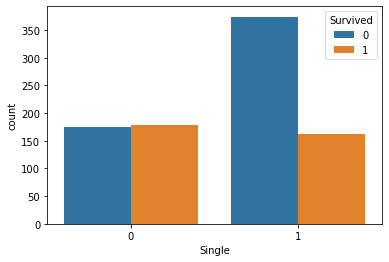

In [50]:
sns.countplot(data=train, x='Single', hue='Survived')

16. SibSp와 Parch을 합친 총 가족수 컬럼을 만들어 봅시다. 컬럼 이름은 Family로 하겠습니다. SibSp + Parch + 1을 하여 승객 본인도 포함시켜
    총 수를 입력합시다. pivot table을 활용하여 아래와 같은 dataframe을 도출해보세요.
![문제16](문제16.jpg)

In [69]:
index = ['Family']
values = ['Survived']
aggfunc = ['mean']
pd.pivot_table(train, index=index, values=values, aggfunc=aggfunc)

,mean
,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000


In [56]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean()

,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


17. 아래와 같은 그래프를 도출해보세요. family 수는 2~4 사이일 때 가장 생존율이 높은 것으로 보입니다.
![문제17](문제17.jpg)

<AxesSubplot:xlabel='Family', ylabel='count'>

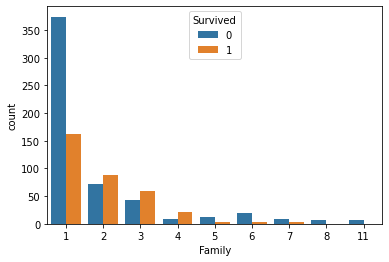

In [57]:
sns.countplot(data=train, x='Family', hue='Survived')

18. Family 컬럼을 참고하여 수자의 크기에 따라 single, small, big으로 분류하는 FamilySize 컬럼을 만들어 봅시다. Family가 1일 때는 single,
    1보다 크고 5보다 작을 땐 small, 5이상일 땐 big을 입력합니다. pivot table을 활용하여 아래 dataframe을 도출해 보세요.
![문제18](문제18.jpg)

In [67]:
train.loc[(train['Family']==1), 'FamilySize'] = 'single'
train.loc[(train['Family']>1)&(train['Age']<5), 'FamilySize'] = 'small'
train.loc[(train['Family']>=5), 'FamilySize'] = 'big'

index = ['FamilySize']
values = ['Survived']
aggfunc = ['mean']
pd.pivot_table(train, index=index, values=values, aggfunc=aggfunc)

,mean
,Survived
FamilySize,
big,0.161290
single,0.303538
small,0.928571


In [66]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean()

,Survived
FamilySize,
big,0.161290
single,0.303538
small,0.928571


19. 아래와 같은 그래프를 도출해보세요.
![문제19](문제19.jpg)

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

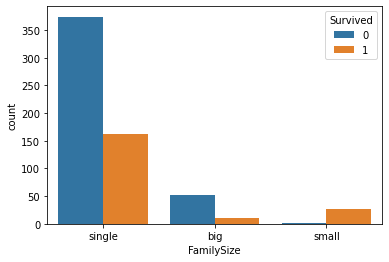

In [70]:
sns.countplot(data=train, x='FamilySize', hue='Survived')

20. pivot table을 활용하여 아래와 같은 dataframe을 만들어 보세요. 여성이 매우 높은 생존율을 보이는 걸 알 수 있습니다.
![문제20](문제20.jpg)

In [71]:
index = ['Sex']
values = ['Survived']
aggfunc = ['mean']
pd.pivot_table(train, index=index, values=values, aggfunc=aggfunc)

,mean
,Survived
Sex,
female,0.742038
male,0.188908


21. 아래와 같은 그래프를 도출해보세요.
![문제21](문제21.jpg)

<AxesSubplot:xlabel='Sex', ylabel='count'>

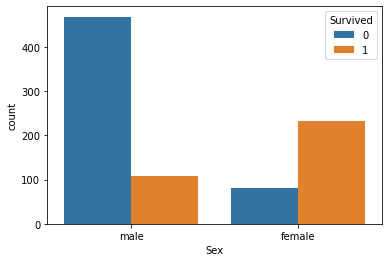

In [72]:
sns.countplot(data=train, x='Sex', hue='Survived')

22. Sex 컬럼의 male과 female은 머신러닝 학습 데이터로는 적합하지 않습니다. 적합하도록 새로운 Sex_number라는 새로운 컬럼을 만들어 봅시다.
    male은 0, female은 1로 입력합시다. 아래와 같은 dataframe을 도출해 보세요.
![문제22](문제22.jpg)

In [85]:
train.loc[train['Sex'] == 'male', 'Sex_number'] =0
train.loc[train['Sex'] == 'female', 'Sex_number'] =1
train_aaa = train[['Sex','Sex_number']]
train_aaa

,Sex,Sex_number
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0
...,...,...
887,male,0.0
888,female,1.0
889,female,1.0


23. 남성과 여성의 생존율 차이가 극명합니다. 좀더 디테일하게 확인해 봅시다. Titles 컬럼을 만들어 Mr, Miss, Mrs, Master로 분류해 봅시다.
    Master는 당시에 결혼하지 않은 남성에게 붙이는 호칭이었습니다. .str.contains을 사용하면 문자열에서 특정 문자열이 포함 유무를 확인
    할 수 있으니 사용하여 새로운 컬럼을 만들어 봅시다. 아래와 같은 dataframe을 도출해 보세요.
![문제23](문제23.jpg)

In [ ]:
train.loc[(train[''])(), 'Titles'] = ''

24. 아래와 같은 그래프를 작성해보세요. 남성 중에선 Mr보다 Master의 생존율이 높게 나옵니다. 
![문제24](문제24.jpg)

In [ ]:
# code를 작성하세요.

## 수고하셨습니다!